In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load the dataset into a Pandas DataFrame.
gold_data=pd.read_csv('gld_price_data.csv')

In [3]:
# print the first 5 columns of the dataset.
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# Last five rows of a dataset.
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# No of rows and columns
gold_data.shape
# The dataset has 2290 rows and 6 columns.

(2290, 6)

In [6]:
# Getting basic information about the dataset.
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the no of missing values.
gold_data.isnull().sum()
# There are no null values in the dataset.

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# describe dataset
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
# correlation variable
correlation=gold_data.corr()

<AxesSubplot:>

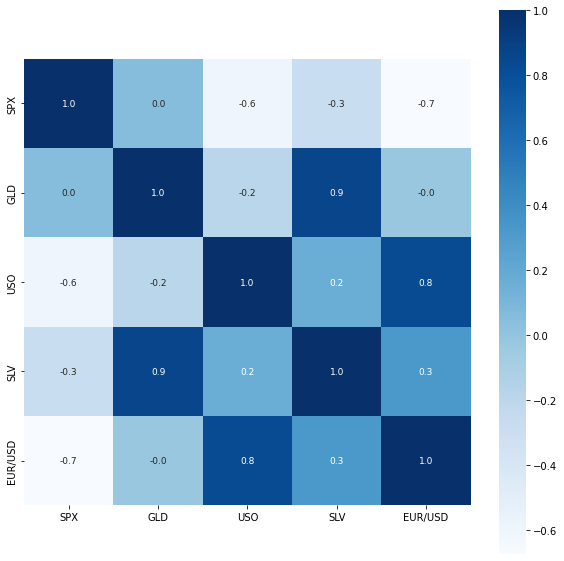

In [10]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':9}, cmap='Blues')

In [11]:
# correlation values for GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/home/amey/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

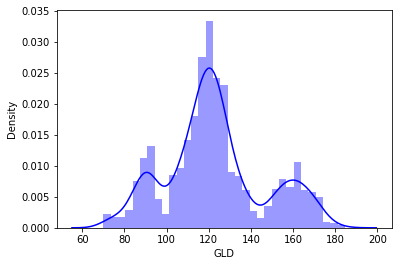

In [12]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='blue')

In [13]:
# Splitting the dataset into target variable and features.
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [14]:
print(X)


              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [16]:
# Splitting the dataset into trainning dataset and test data.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=20)

In [17]:
# Model Trainnig
# We use Random Forest Regressor.

In [18]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [19]:
# Hyperparameter tuning using gridsearchCV.
# Finding the best parameters for random forest regressor.
from sklearn.model_selection import GridSearchCV

#number of trees in random forest.
n_estimators= [100]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]
#True means bootstrap samples are used and False means the whole dataset is used.

In [20]:
# Create the random_grid to be tested.
random_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [21]:
print(random_grid)

{'n_estimators': [100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [22]:
gridsearch_random=GridSearchCV(regressor,random_grid,cv=2,scoring='neg_mean_squared_error',refit=True,return_train_score=True,verbose=3)
gridsearch_random.fit(X_train,Y_train)
gridsearch_random.best_estimator_

Fitting 2 folds for each of 648 candidates, totalling 1296 fits
[CV 1/2] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-1.312, test=-8.673) total time=   0.3s
[CV 2/2] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-1.499, test=-6.765) total time=   0.3s
[CV 1/2] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=-1.842, test=-8.643) total time=   0.3s
[CV 2/2] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=-2.193, test=-7.403) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-3.367, test=-10.258) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=10, max_features=aut

[CV 2/2] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=-4.750, test=-8.080) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=-4.858, test=-12.796) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=-5.383, test=-8.376) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=(train=-4.834, test=-13.097) total time=   0.3s
[CV 2/2] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=(train=-5.238, test=-8.227) total time=   0.3s
[CV 1/2] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;,

[CV 1/2] END bootstrap=True, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-3.610, test=-11.603) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-3.976, test=-7.355) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=-2.265, test=-9.569) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=-2.724, test=-6.764) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=-2.540, test=-10.432) total time=   0.3s
[CV 2/2] END bootstrap=True, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;,

[CV 2/2] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=(train=-4.865, test=-7.691) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=(train=-4.894, test=-13.266) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=(train=-5.257, test=-8.431) total time=   0.3s
[CV 1/2] END bootstrap=True, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-1.113, test=-9.564) total time=   0.3s
[CV 2/2] END bootstrap=True, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-1.312, test=-6.447) total time=   0.3s
[CV 1/2] END bootstrap=True, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, 

[CV 1/2] END bootstrap=True, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=-2.438, test=-9.872) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=-2.950, test=-7.192) total time=   0.3s
[CV 1/2] END bootstrap=True, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=-4.079, test=-12.447) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=-4.439, test=-7.675) total time=   0.3s
[CV 1/2] END bootstrap=True, max_depth=22, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=-4.724, test=-12.897) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=22, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;,

[CV 2/2] END bootstrap=True, max_depth=26, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-1.505, test=-6.205) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=26, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=-2.099, test=-10.121) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=26, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=-2.286, test=-6.613) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=26, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-3.653, test=-11.808) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=26, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-3.837, test=-7.483) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=26, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;,

[CV 1/2] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=-4.015, test=-11.000) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=-4.087, test=-8.396) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=(train=-4.002, test=-10.599) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=(train=-4.086, test=-8.394) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=(train=-4.377, test=-11.183) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;

[CV 2/2] END bootstrap=True, max_depth=34, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-3.460, test=-7.694) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=34, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=-2.227, test=-9.226) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=34, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=-2.235, test=-7.422) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=34, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=-2.290, test=-9.173) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=34, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=-2.690, test=-7.373) total time=   0.3s
[CV 1/2] END bootstrap=True, max_depth=34, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, s

[CV 1/2] END bootstrap=True, max_depth=34, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=(train=-4.754, test=-12.512) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=34, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=(train=-5.136, test=-8.418) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-1.079, test=-8.405) total time=   0.3s
[CV 2/2] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-1.258, test=-6.545) total time=   0.3s
[CV 1/2] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=-1.802, test=-9.167) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, 

[CV 1/2] END bootstrap=True, max_depth=38, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=-4.089, test=-11.905) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=38, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=-4.444, test=-7.716) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=38, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=-4.557, test=-11.879) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=38, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=-4.913, test=-8.218) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=38, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=(train=-4.609, test=-12.179) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=38, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;

[CV 2/2] END bootstrap=True, max_depth=42, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=-2.198, test=-6.544) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=42, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-3.678, test=-11.726) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=42, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-3.989, test=-7.815) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=42, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=-2.201, test=-10.188) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=42, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=-2.746, test=-6.799) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=42, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;,

[CV 1/2] END bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=(train=-4.561, test=-12.374) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=(train=-4.989, test=-8.196) total time=   0.3s
[CV 1/2] END bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=(train=-4.843, test=-12.589) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=(train=-5.314, test=-8.266) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-1.195, test=-9.131) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;,

[CV 2/2] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=-2.608, test=-6.657) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=-2.642, test=-10.256) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=-3.021, test=-7.125) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=-3.954, test=-11.664) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=-4.449, test=-7.707) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;,

[CV 1/2] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-1.219, test=-9.578) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-1.446, test=-6.207) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=-1.945, test=-10.210) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=-2.262, test=-6.643) total time=   0.2s
[CV 1/2] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-3.634, test=-11.410) total time=   0.2s
[CV 2/2] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_esti

[CV 2/2] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=-3.907, test=-14.833) total time=   0.3s
[CV 1/2] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=-4.540, test=-15.465) total time=   0.3s
[CV 2/2] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=-3.875, test=-14.562) total time=   0.3s
[CV 1/2] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=(train=-4.540, test=-15.452) total time=   0.3s
[CV 2/2] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=(train=-3.875, test=-14.559) total time=   0.3s
[CV 1/2] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimat

[CV 1/2] END bootstrap=False, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-2.727, test=-16.053) total time=   0.3s
[CV 2/2] END bootstrap=False, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-2.959, test=-15.915) total time=   0.3s
[CV 1/2] END bootstrap=False, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=-1.231, test=-16.790) total time=   0.3s
[CV 2/2] END bootstrap=False, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=-1.230, test=-12.818) total time=   0.3s
[CV 1/2] END bootstrap=False, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=-1.344, test=-16.734) total time=   0.3s
[CV 2/2] END bootstrap=False, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimat

[CV 2/2] END bootstrap=False, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=(train=-2.351, test=-7.480) total time=   0.2s
[CV 1/2] END bootstrap=False, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=(train=-2.394, test=-10.552) total time=   0.2s
[CV 2/2] END bootstrap=False, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=(train=-2.721, test=-7.834) total time=   0.2s
[CV 1/2] END bootstrap=False, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-0.000, test=-14.326) total time=   0.3s
[CV 2/2] END bootstrap=False, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-0.000, test=-15.184) total time=   0.4s
[CV 1/2] END bootstrap=False, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimator

[CV 1/2] END bootstrap=False, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=-0.511, test=-8.515) total time=   0.2s
[CV 2/2] END bootstrap=False, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=-0.872, test=-6.891) total time=   0.2s
[CV 1/2] END bootstrap=False, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=-1.850, test=-9.735) total time=   0.2s
[CV 2/2] END bootstrap=False, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=-1.965, test=-7.163) total time=   0.2s
[CV 1/2] END bootstrap=False, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=-2.086, test=-9.773) total time=   0.2s
[CV 2/2] END bootstrap=False, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1

[CV 2/2] END bootstrap=False, max_depth=22, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-0.000, test=-5.989) total time=   0.3s
[CV 1/2] END bootstrap=False, max_depth=22, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=-0.193, test=-8.327) total time=   0.2s
[CV 2/2] END bootstrap=False, max_depth=22, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=-0.329, test=-6.614) total time=   0.2s
[CV 1/2] END bootstrap=False, max_depth=22, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-1.430, test=-9.530) total time=   0.2s
[CV 2/2] END bootstrap=False, max_depth=22, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-1.477, test=-6.830) total time=   0.2s
[CV 1/2] END bootstrap=False, max_depth=22, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1

[CV 1/2] END bootstrap=False, max_depth=26, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=-2.187, test=-9.925) total time=   0.2s
[CV 2/2] END bootstrap=False, max_depth=26, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=-2.274, test=-7.362) total time=   0.2s
[CV 1/2] END bootstrap=False, max_depth=26, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=(train=-2.101, test=-9.945) total time=   0.2s
[CV 2/2] END bootstrap=False, max_depth=26, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=(train=-2.352, test=-7.266) total time=   0.2s
[CV 1/2] END bootstrap=False, max_depth=26, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=(train=-2.543, test=-10.353) total time=   0.2s
[CV 2/2] END bootstrap=False, max_depth=26, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=

[CV 2/2] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-1.540, test=-6.872) total time=   0.2s
[CV 1/2] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=-0.456, test=-8.494) total time=   0.2s
[CV 2/2] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=-0.668, test=-6.418) total time=   0.2s
[CV 1/2] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=-0.563, test=-8.854) total time=   0.2s
[CV 2/2] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=-0.836, test=-6.822) total time=   0.2s
[CV 1/2] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1

[CV 1/2] END bootstrap=False, max_depth=34, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=(train=-4.791, test=-15.705) total time=   0.3s
[CV 2/2] END bootstrap=False, max_depth=34, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=(train=-4.149, test=-14.541) total time=   0.3s
[CV 1/2] END bootstrap=False, max_depth=34, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-0.000, test=-8.028) total time=   0.3s
[CV 2/2] END bootstrap=False, max_depth=34, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-0.000, test=-6.014) total time=   0.3s
[CV 1/2] END bootstrap=False, max_depth=34, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=-0.207, test=-8.486) total time=   0.2s
[CV 2/2] END bootstrap=False, max_depth=34, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators

[CV 2/2] END bootstrap=False, max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=-1.951, test=-12.982) total time=   0.3s
[CV 1/2] END bootstrap=False, max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=-3.701, test=-17.752) total time=   0.3s
[CV 2/2] END bootstrap=False, max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=-3.723, test=-14.687) total time=   0.3s
[CV 1/2] END bootstrap=False, max_depth=38, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=-4.480, test=-15.412) total time=   0.3s
[CV 2/2] END bootstrap=False, max_depth=38, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=-3.690, test=-14.406) total time=   0.3s
[CV 1/2] END bootstrap=False, max_depth=38, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimat

[CV 1/2] END bootstrap=False, max_depth=42, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=-0.397, test=-14.348) total time=   0.3s
[CV 2/2] END bootstrap=False, max_depth=42, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=-1.186, test=-15.170) total time=   0.3s
[CV 1/2] END bootstrap=False, max_depth=42, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-2.727, test=-15.840) total time=   0.3s
[CV 2/2] END bootstrap=False, max_depth=42, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-2.959, test=-15.954) total time=   0.3s
[CV 1/2] END bootstrap=False, max_depth=42, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=-1.231, test=-16.755) total time=   0.3s
[CV 2/2] END bootstrap=False, max_depth=42, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimat

[CV 2/2] END bootstrap=False, max_depth=42, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=-2.274, test=-7.353) total time=   0.2s
[CV 1/2] END bootstrap=False, max_depth=42, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=(train=-2.074, test=-9.671) total time=   0.2s
[CV 2/2] END bootstrap=False, max_depth=42, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=(train=-2.313, test=-7.360) total time=   0.2s
[CV 1/2] END bootstrap=False, max_depth=42, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=(train=-2.444, test=-10.233) total time=   0.2s
[CV 2/2] END bootstrap=False, max_depth=42, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=(train=-2.507, test=-7.606) total time=   0.2s
[CV 1/2] END bootstrap=False, max_depth=46, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=

[CV 1/2] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=-0.445, test=-8.463) total time=   0.2s
[CV 2/2] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=-0.620, test=-6.403) total time=   0.2s
[CV 1/2] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=-0.532, test=-8.285) total time=   0.2s
[CV 2/2] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=-0.865, test=-6.541) total time=   0.2s
[CV 1/2] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=-1.926, test=-9.647) total time=   0.2s
[CV 2/2] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1

[CV 2/2] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=(train=-2.662, test=-7.780) total time=   0.2s
[CV 1/2] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-0.000, test=-8.199) total time=   0.3s
[CV 2/2] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-0.000, test=-6.063) total time=   0.3s
[CV 1/2] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=-0.189, test=-8.394) total time=   0.2s
[CV 2/2] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=-0.361, test=-5.939) total time=   0.2s
[CV 1/2] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1

[CV 1/2] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=-1.926, test=-9.791) total time=   0.2s
[CV 2/2] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=-1.863, test=-6.768) total time=   0.2s
[CV 1/2] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=-2.136, test=-10.199) total time=   0.2s
[CV 2/2] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=-2.313, test=-7.454) total time=   0.2s
[CV 1/2] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=(train=-2.122, test=-9.741) total time=   0.2s
[CV 2/2] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n

RandomForestRegressor(bootstrap=False, max_depth=14, max_features='sqrt')

In [23]:
# The best estimators are RandomForestRegressor(bootstrap=False, max_depth=46, max_features='sqrt'.
# Lets try for best parameters.
gridsearch_random.best_params_

{'bootstrap': False,
 'max_depth': 14,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [24]:
regressor=RandomForestRegressor(bootstrap=False,
 max_depth= 46,
 max_features= 'sqrt',
 min_samples_leaf=1,
 min_samples_split=2,
 n_estimators=100)

In [25]:
# Training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=False, max_depth=46, max_features='sqrt')

In [26]:
#Model Evaluation
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [27]:
print(test_data_prediction)

[167.00819863 142.85999776 159.81669558 107.98829767 142.28569986
 107.71599895 114.31309911 120.2285005   85.16750015 125.37860004
 115.03280099 108.12799994 154.85840282 112.46020046 119.14589947
 102.49069879 119.70200118 114.95570044 122.43439822 167.20760279
 104.73509939 152.17510239 108.19540032 120.14719958 118.52049931
 120.13079918  91.1010021  127.48669717 127.48740131 110.60389896
 121.57370062 122.61811493 121.00520099  70.40199981 107.88780093
  85.79329829 133.61369921 161.89689698 121.86379884 114.49950021
 140.72279744 167.94339909 116.01520181 121.19290125 154.48120315
 166.69169941 163.12840023 115.51550049 133.7367023   81.50990245
  92.43670124 119.45059887 127.73879719  91.99529944  71.18210055
 119.86460058  90.49670113  91.9336     120.18479786 146.42569598
 162.59830025 112.42309942  94.2267009  127.9817984  126.29410219
 118.81280037 127.43009762 127.48440028 123.73189942 106.60199885
 175.26350115 151.94339998 131.32949895 150.48850235 124.23790037
  91.08340

In [28]:
# R squared error
from sklearn import metrics
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9917539182033765


In [29]:
# Compare the actual and predicted values in a plot.
Y_test = list(Y_test)

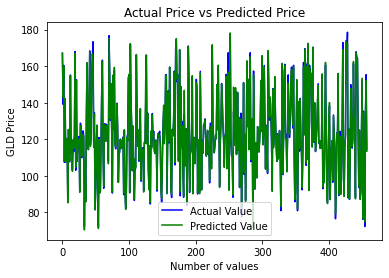

In [30]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()